<a href="https://colab.research.google.com/github/boulchouk1/Proyecto-DS-1-CoderHouse/blob/main/ProyectoDSParte_II_Boulchouk_Alexis_Comisi%C3%B3n_84650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción y objetivo del Dataset: **Healthcare Appointment Dataset**


### - El dataset **Healthcare Appointment Dataset** está compuesto por registros de un centro de atención sanitaria de Brasil. Su variable principal hace referencia a la asistencia de los pacientes a sus citas médicas programadas.

### - El objetivo del mismo es predecir si un paciente asistirá o no a su cita médica, utilizando distintas **features** relacionadas con su salud y su comportamiento habitual. Como parámetro comparativo contamos con el campo de **(Showed_up)** que nos indica si el paciente finalmente asistió o no a su cita.

# Descripción de campos:



### 1. **PatientId:**
- Descripción: Identificador único del paciente.
- Detalle: Cada paciente tiene un número único para rastrear sus citas médicas.

### 2. **AppointmentID:**
- Descripción: Identificador único de la cita médica.
- Detalle: Permite diferenciar varias citas del mismo paciente.

### 3. **Gender:**
- Descripción: Género del paciente.
- Detalle: En el dataset clasificados como “M” para masculino y “F” para femenino.

### 4. **ScheduledDay:**
- Descripción: Fecha y hora en que el paciente programó la cita.

### 5. **AppointmentDay:**
- Descripción: Fecha real de la cita médica.

### 6. **Age:**
- Descripción: Edad del paciente en años.
- Detalle: El dataset contiene una edad mínima de 1 y una edad máxima de 115.

### 7. **Neighbourhood:**
- Descripción: Barrio o área donde se encuentra la clínica/hospital.
- Detalle: Permite detectar patrones de asistencia por zona.

### 8. **Scholarship:**
- Descripción: Indica si el paciente participa en el programa de becas del gobierno.
- Detalle: Esto permite ver que tanto afecta la asistencia el hecho de tener la cita subsidiada o no por el gobierno. Clasificado en el Dataset como TRUE o FALSE.

### 9. **Hipertension:**
- Descripción: Indica si el paciente tiene hipertensión.
- Detalle: Clasificado en el Dataset como TRUE o FALSE.

### 10. **Diabetes:**
- Descripción: Indica si el paciente tiene diabetes.
- Detalle: Clasificado en el Dataset como TRUE o FALSE.

### 11. **Alcoholism:**
- Descripción: Indica si el paciente tiene problemas relacionados con el alcohol.
- Detalle: Clasificado en el Dataset como TRUE o FALSE.

### 12. **Handcap:**
- Descripción: Indica si el paciente tiene alguna discapacidad.
- Detalle: Clasificado en el Dataset como TRUE o FALSE.

### 13. **SMS_received:**
- Descripción: Indica si el pasiente recibió un recordatorio por SMS antes de la cita recordandole la misma.
- Detalle: Permite analizar si el SMS recordatorio aumenta la asistencia o no.

### 14. **Showed_up:**
- Descripción: Es la variable objetivo para predecir e indica si el paciente asistió a la cita.
- Detalle: Clasificado en el Dataset como TRUE o FALSE.

### 15. **Date_diff:**
- Descripción: Diferencia en días entre ScheduledDay y AppointmentDay.
- Detalle: Indica cuántos días antes se programó la cita.

# Preguntas e hipótesis para un análisis inicial:



###A medida que nos adentramos en el dataset para poder comenzar con nuestra predicción surgen preguntas que debemos resolver para poder tener un panorama mucho mas claro:


- ¿Qué tan fiable es nuestra base de datos? ¿Cual es su porcentaje de vacíos?

- ¿Los datos de cada campo se encuentran dentro de los parámetros "normales"? ¿No poseen errores?

- ¿Los pacientes mas jóvenes poseen una asistencia menor debido a su grado de responsabilidad?
 - **Hipótesis:** Entendemos que si, por el comportamiento normal de la sociedad el porcentaje de asistencia debería verse fuertemente afectado por el grupo etario debido a la responsabilidad del mismo.

- ¿Mientras mas grande es el tiempo de antelación con el que se pacta la cita, más probabilidad hay de que no asistan a la misma?
 - **Hipótesis:** Si, hay mucha probabilidad de que no asistan al olvidarse de la misma pasado mas de 2 meses.

- ¿Al no pagar por la consulta médica, los pacientes con subsidio, tienden a no asistir a las mismas?
 - **Hipótesis:** Los pacientes deberían tender a no asistir ya que no generan un compromiso real con la cita al no tener un impacto monetario en sus finanzas.

- ¿Qué tan probable es que un paciente no asista a su cita médica al no recibir un SMS recordatorio?
 - **Hipótesis:** Es muy probable ya que al no recibir el SMS confirmatorio los pacientes tienden a olvidarse de la misma.

- ¿Cuáles son las variables mas imporantes a la hora de determinar si un paciente asistirá a su cita médica?
 - **Hipótesis:** Las variables mas importantes deberian ser las que corresponden a las enfermedades y a los tiempos de antelación con los que se programa la cita médica.

# Análisis de datos Parte 1:

### Para comenzar con el análisis de exploración dividiremos las tareas a realizar en los siguientes pasos:

- Carga del Dataset, asegurandose de que el mismo se haga de manera correcta.
- Evaluar la pérdida de datos. Verigficar vacíos.
- Realizar gráficos de análisis.
- Realizar análisis numéricos.

#DATASET:

##Carga y vista del dataset:

- Para poder hacer una carga eficiente del dataset en GitHub se tuvo que borrar las comillas dobles que venian en el dataset original de cada uno de los campos con cadenas de texto ya que eso generaba que no se lea como tabla. Además se tomaron unicamente los primeros 2000 registros requeridos por la consigna del curso facilitando la vista previa desde GitHub.

In [4]:
# Importe de las librerias a utilizar:

import pandas as pd # Manejo de datos en dataframes.
import numpy as np # Para trabajar con operaciones matemáticas en arrays.
import seaborn as sns # Para construcción de gráficos.
from matplotlib import pyplot as plt # Para personalización de gráficos.
from matplotlib import dates as mpl_dates # Para utlizar fechas en formato correcto dentro de gráficos.
from datetime import datetime, timedelta # Para poder hacer operaciones entre fechas.

# Carga del dataset a utilizar:

df=pd.read_csv('https://raw.githubusercontent.com/boulchouk1/Proyecto-DS-1-CoderHouse/refs/heads/main/healthcare_noshows%202K%20F.csv') #Cargamos el Dataframe.
# En caso de querer leer un dataset que se encuentra en la misma carpeta de drive que el colab podemos utilizar directamente el nombre del mismo .csv para leerlo.
df = df.replace({True: 1, False: 0}).infer_objects(copy=False) #Reemplazamos los datos booleanos en 1 y 0 para una mejor lectura de los mismos más adelante.
df #Mostramos el Dataframe.

/tmp/ipython-input-2294829930.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0}).infer_objects(copy=False) #Reemplazamos los datos booleanos en 1 y 0 para una mejor lectura de los mismos más adelante.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,677466391424625,5640082,F,2016-04-29,2016-04-29,7,SANTA MARTHA,0,0,0,0,0,0,1,0
1996,7715731825397,5639656,F,2016-04-29,2016-04-29,35,SANTA MARTHA,0,0,0,0,0,0,1,0
1997,795521486414,5639646,M,2016-04-29,2016-04-29,38,SANTA MARTHA,0,0,0,0,0,0,1,0
1998,3852296491197,5638872,F,2016-04-29,2016-04-29,37,SANTA MARTHA,1,1,1,0,0,0,1,0


## Vemos un paneo general de los tipos de datos y si poseen null (faltantes):

In [ ]:
# Convertimos las fechas a formato datetime64[ns] ya que originalmente son leidas como tipo de dato object:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# Mostramos la información de manera correcta:
df.info()
# Detectamos que no poseemos datos faltantes al ver 2000 non-null en cada uno de los campos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       2000 non-null   int64         
 1   AppointmentID   2000 non-null   int64         
 2   Gender          2000 non-null   object        
 3   ScheduledDay    2000 non-null   datetime64[ns]
 4   AppointmentDay  2000 non-null   datetime64[ns]
 5   Age             2000 non-null   int64         
 6   Neighbourhood   2000 non-null   object        
 7   Scholarship     2000 non-null   int64         
 8   Hipertension    2000 non-null   int64         
 9   Diabetes        2000 non-null   int64         
 10  Alcoholism      2000 non-null   int64         
 11  Handcap         2000 non-null   int64         
 12  SMS_received    2000 non-null   int64         
 13  Showed_up       2000 non-null   int64         
 14  Date.diff       2000 non-null   int64         
dtypes: d

In [ ]:
df.isnull().sum() # Comprobamos que no poseen valores nulos ninguno de los campos.

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


## Vemos mas información básica del dataset:

In [ ]:
df.shape # Vemos Filas, Columnas)

(2000, 15)

In [ ]:
df.columns.tolist() #Vemos las columnas que tiene el Dataset.

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'Showed_up',
 'Date.diff']

## Vemos un resumen estadístico descriptivo de las columnas que poseen datos numéricos medibles (descartamos PAtientID y AppointmentID):

In [ ]:
df[["Age","Date.diff"]].describe().round(0) # Elegimos las columnas sobre las cuales queremos ver la descripción y las redondeamos a cero para poder tener una vista mas clara.

,Age,Date.diff
count,2000.0,2000.0
mean,37.0,13.0
std,23.0,17.0
min,1.0,0.0
25%,19.0,0.0
50%,35.0,3.0
75%,55.0,22.0
max,98.0,115.0


## Cálculo de CV en campo Age: y Date.Diff:

In [ ]:
#Creamos una función para calcular el CV (coeficiente de variación)
def calculo_cv(df, campo):
    media = df[campo].mean()
    desvest = df[campo].std()
    cv = (desvest / media) * 100
    return cv

CV_age = calculo_cv(df,'Age').round(2) #Resultado ejemplo de la función
CV_DateDiff = calculo_cv(df,'Date.diff').round(2) #Resultado ejemplo de la función

print(f"Coefifiente de variacion de edades: ",CV_age)
print(f"Coefifiente de variacion de Días de antelación: ",CV_DateDiff)



Coefifiente de variacion de edades:  61.34
Coefifiente de variacion de Días de antelación:  131.54


Calculando el coeficiente de variación de ambos campos notamos que en los 2 hay una alta heterogeneidad. Esto nos indica que el desvío estándar es alto en comparacion a la media llegando a la conclusion que la media no necesariamente representa de manera correcta los datos del campo.

## Validando "normalidad" de la muestra (Age):

In [ ]:
df_menor_18_sinAlc = df[(df['Age'] < 18) & (df['Alcoholism'] == 0)]
df_menor_18_conAlc = df[(df['Age'] < 18) & (df['Alcoholism'] == 1)]

df_menor_18_conAlc


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Age_group
1393,966849854418,5561947,F,2016-04-08,2016-04-29,16,JESUS DE NAZARETH,1,0,0,1,0,1,0,21,1-20


- Verificamos que si bien hay 1 solo paciente menor a 18 años con alcoholismo el mismo posee 16 años y no es representativo a la muestra (2000 registros).

## Tratamiento de NaN (En caso de haber tenido/tener con una actualización de la muestra):

En caso de existir NaN en el campo **Age**, al no contar con una media representativa de la muestra (debido al resultado obtenido del coeficiente de variación), el tratamiento a darle seria imputrarle el valor de la mediana ya que es mas representativa a la muestra junto al filtro de **Gender** para una mayor proximidad.

En caso de existir NaN en el campo de **Date.diff**, sabiendo que la media tampoco es representativa a la muestra y al tratarse de un valor compuesto por otros 2 campos, le imputaria un valor exagerado fuera de la muestra para poder identificar/filtrar esos casos de manera mas efectiva ya que los demas campos si tienen relevancia a la hora del análisis.

Respecto a los **campos con valores booleanos**, me apoyaria en la columna de Edad para poder evaluar el porcentaje de True y False para imputar esos valores en la misma proporción.

#GRÁFICOS:

## GRÁFICOS DE 2 VARIABLES: Age VS Showed_up

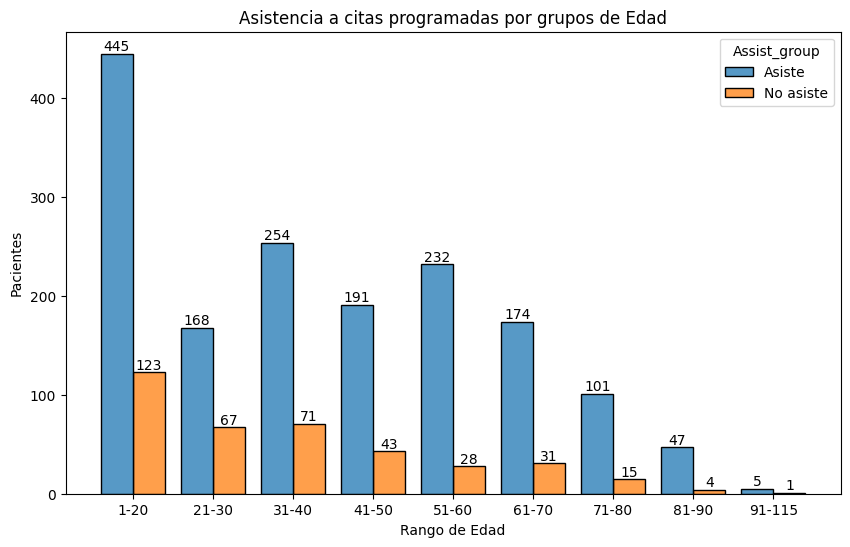

In [ ]:
# Defino los limites de edad de manera manual. Sabiendo que mi mínimo es de 1 y mi maximo es de 115
bins_edad = [1,21,30,40,50,60,70,80,90,115]
# Asigno las etiquetas para cada uno de los intervalos.
labels_edad = ["1-20","21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-115"]
# Creo la columna de Edad.
df.loc[:,'Age_group'] = pd.cut(df['Age'], bins=bins_edad, labels=labels_edad, right=False).astype("category")
# Creo la columna de Asistencia.
df.loc[:,'Assist_group'] = df['Showed_up'].replace({0:'No asiste',1:'Asiste'})
# Grafico el histograma usando las columnas creadas.
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='Age_group', stat='count', discrete=True, hue='Assist_group',multiple="dodge",shrink=0.8)
# Personalizo el histograma.
plt.title("Asistencia a citas programadas por grupos de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Pacientes")
# Agrego la cantidad de pacientes encima de cada barra
for container in ax.containers:
    ax.bar_label(container)
# Muestro el grafico
plt.show()

- En el gráfico creado podemos ver que, tanto de manera proporcional como significativa a la muestra, el rango de edad que posee una asistencia menor a sus citas programadas es la de 21 a 30 años.

In [ ]:
col_asistio = [col for col in totales.index if 'asist' in col.lower()][0]
col_no_asistio = [col for col in totales.index if 'no' in col.lower()][0]

# Recalculamos 'Total' correctamente (sumando 'Asiste' + 'No asiste')
tabla['Total'] = tabla[col_asistio] + tabla[col_no_asistio]
# Ahora calculamos el % de asistencia
tabla['% Asistencia'] = (tabla[col_asistio] / tabla['Total']) * 100
# Redondeamos a 2 decimales
tabla['% Asistencia'] = tabla['% Asistencia'].round(2)
# Mostramos el resultado
tabla


Assist_group,Age_group,Asiste,No asiste,Total,% Asistencia
0,1-20,445,123,568,78.35
1,21-30,168,67,235,71.49
2,31-40,254,71,325,78.15
3,41-50,191,43,234,81.62
4,51-60,232,28,260,89.23
5,61-70,174,31,205,84.88
6,71-80,101,15,116,87.07
7,81-90,47,4,51,92.16
8,91-100,5,1,6,83.33


- Continuamos corroborandolo mediante una tabla y vemos que efectivamente el 71.49% de los pacientes entre 21 y 30 años asistieron a sus citas siendo el porcentaje mas bajo de toda la muestra.

## GRÁFICO DE 2 VARIABLES: Date.Diff VS Showed_up

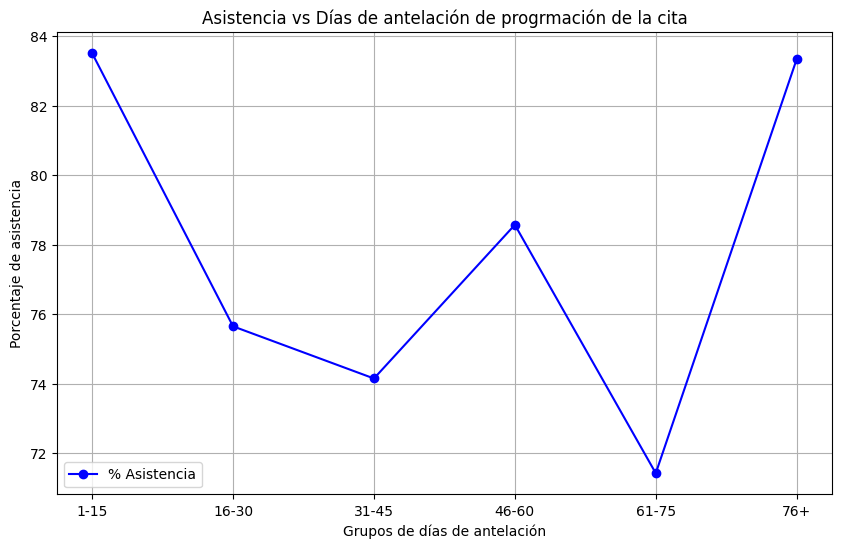

In [ ]:
#defino rangos etarios
bins = [0, 15, 30, 45, 60, 75, float('inf')]
labels = ['1-15', '16-30', '31-45', '46-60', '61-75', '76+']

# creo columna de grupo de edades
df['Dias_antelacion'] = pd.cut(df['Date.diff'], bins=bins, labels=labels, right=True,include_lowest=True)

resumen = df.groupby('Dias_antelacion', observed=False).agg(
    Total=('Showed_up', 'count'),          # total de registros en el grupo
    Asistieron=('Showed_up', 'sum')        # suma de los que asistieron (debe ser 1 para los que asistieron)
).reset_index()

resumen['Showed_up_pct'] = resumen['Asistieron'] / resumen['Total'] * 100

resumen

# Grafico
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(resumen['Dias_antelacion'], resumen['Showed_up_pct'], marker='o', label='% Asistencia', color='blue')

ax.set_xlabel('Grupos de días de antelación')
ax.set_ylabel('Porcentaje de asistencia')
ax.set_title('Asistencia vs Días de antelación de progrmación de la cita')
ax.legend()
ax.grid(True)

plt.show()

- Se visualiza en formato de tabla las columna creada de dias_antelacion para asegurar que cada registro pertenesca a cada grupo respectivamente.

In [ ]:
df_mayor_76 = df[df['Date.diff'] > 76]
df_mas16menos30 = df[(df['Date.diff'] >= 16) & (df['Date.diff'] <= 30)]
df_menorOigual_15 = df[df['Date.diff'] <= 15]
df_mas16menos30

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Age_group,Assist_group,Dias_antelacion
49,92235587471561,5534656,F,2016-03-31,2016-04-29,27,GRANDE VITÓRIA,0,0,0,0,0,1,0,29,21-30,No asiste,16-30
50,182717227234941,5534661,F,2016-03-31,2016-04-29,19,GRANDE VITÓRIA,0,0,0,0,0,1,0,29,1-20,No asiste,16-30
51,46946985511333,5534635,F,2016-03-31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,0,29,21-30,No asiste,16-30
52,798756986275976,5534639,F,2016-03-31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,0,29,21-30,No asiste,16-30
63,5434175738686,5552915,F,2016-04-06,2016-04-29,69,JARDIM DA PENHA,0,1,0,0,0,1,1,23,61+,Asiste,16-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,4954455574425,5525973,F,2016-03-30,2016-04-29,73,REPÚBLICA,0,0,0,0,0,1,0,30,61+,No asiste,16-30
1873,23453192949785,5528687,F,2016-03-30,2016-04-29,53,MATA DA PRAIA,0,0,0,0,0,1,1,30,51-60,Asiste,16-30
1968,4476214669873,5539470,F,2016-04-01,2016-04-29,15,CONSOLAÇÃO,0,0,0,0,0,0,1,28,1-20,Asiste,16-30
1970,4476214669873,5539469,F,2016-04-01,2016-04-29,15,CONSOLAÇÃO,0,0,0,0,0,0,1,28,1-20,Asiste,16-30


- Como conlusión podemos decir que el porcentaje de asistencia es significativamente mayor cuando la programacion de la cita es mas próxima o muy lejana a la fecha en la que se pide. El indicador no lleva una linea decendente constante a medida que la programación se hace mas lejana.

## GRÁFICOS DE 3 VARIABLES: Showed_up - Age - Scholarship

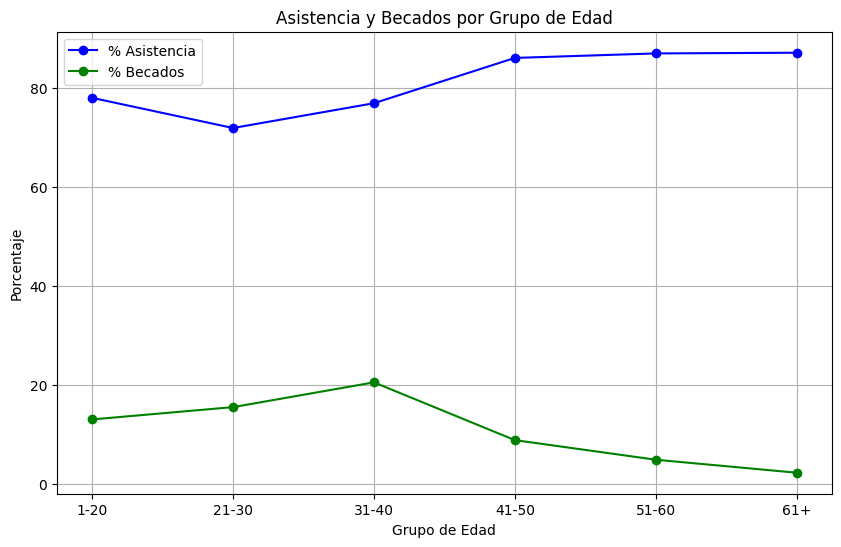

In [ ]:
#defino rangos etarios
bins = [1, 20, 30, 40, 50, 60, 115]
labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61+']

# creo columna de grupo de edades
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculo el porcentaje de asistencia y becados en base a la media
resumen = df.groupby('Age_group', observed=False).agg(
    Showed_up_pct=('Showed_up', 'mean'),
    Scholarship_pct=('Scholarship', 'mean')
).reset_index()

# convierto a porcentaje
resumen['Showed_up_pct'] *= 100
resumen['Scholarship_pct'] *= 100

# Grafico
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(resumen['Age_group'], resumen['Showed_up_pct'], marker='o', label='% Asistencia', color='blue')
ax.plot(resumen['Age_group'], resumen['Scholarship_pct'], marker='o', label='% Becados', color='green')

ax.set_xlabel('Grupo de Edad')
ax.set_ylabel('Porcentaje')
ax.set_title('Asistencia y Becados por Grupo de Edad')
ax.legend()
ax.grid(True)

plt.show()

- Visualizando el gráfico podemos notar que mientas más pacientes becados hay por grupo etario menor es la cantidad de asistencia a las citas médicas.

In [ ]:
tabla = df.groupby("Age_group", observed=False).agg(
    Asiste = ("Showed_up", lambda x: (x == 1).sum()),
    No_asiste = ("Showed_up", lambda x: (x == 0).sum()),
    Becado = ("Scholarship", lambda x: (x == 1).sum()),
    No_becado = ("Scholarship", lambda x: (x == 0).sum())
)
# Recalcular 'Total'
tabla["Total"] = tabla["Asiste"] + tabla["No_asiste"]

# % Asistencia
tabla["% Asistencia"] = (tabla["Asiste"] / tabla["Total"]) * 100
tabla["% Asistencia"] = tabla["% Asistencia"].round(2)
# % Becados
tabla["% Becados"] = (tabla["Becado"] / tabla["Total"]) * 100
tabla["% Becados"] = tabla["% Becados"].round(2)

tabla

,Asiste,No_asiste,Becado,No_becado,Total,% Asistencia,% Becados
Age_group,,,,,,,
1-20,402,113,67,448,515,78.06,13.01
21-30,195,76,42,229,271,71.96,15.50
31-40,244,73,65,252,317,76.97,20.50
41-50,205,33,21,217,238,86.13,8.82
51-60,215,32,12,235,247,87.04,4.86
61+,313,46,8,351,359,87.19,2.23


Confirmamos la conclusión mediante la tabla verificando lo siguiente:
- Los primeros 3 grupos etarios (1 a 40) poseen un bajo % de asistencia y un alto % de becados respecto a los siguientes 3 grupos etarios (41 a 61+).

## GRÁFICOS DE 1 VARIABLE: Analisis SMS_received & Showed_up

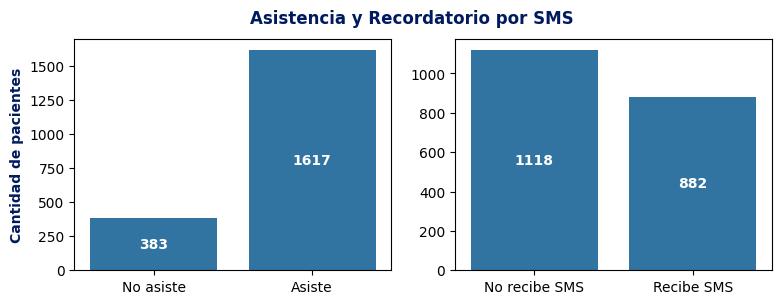

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))  #fig = lienzo, axes = ejes / 1 lienzo 2 ejes / Size horizontal y vertical respectivamente

sns.countplot(x='Showed_up', data=df, ax=axes[0]) #Graficame el countplot, con la variable showed_up del dataframe en el eje de la IZQUIERDA
axes[0].set_xticks([0, 1], labels=['No asiste', 'Asiste'])
axes[0].set_ylabel('Cantidad de pacientes', color='#001A5F', fontweight='bold')
axes[0].set_xlabel('')
axes[0].bar_label(axes[0].containers[0], label_type='center', color='white', fontweight='bold')

sns.countplot(x='SMS_received', data=df, ax=axes[1]) #Graficame el countplot, con la variable showed_up del dataframe en el eje de la DERECHA
axes[1].set_xticks([0, 1], labels=['No recibe SMS', 'Recibe SMS'])
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].bar_label(axes[1].containers[0], label_type='center', color='white', fontweight='bold')

plt.suptitle('Asistencia y Recordatorio por SMS', color='#001A5F', fontweight='bold')
plt.show()

In [ ]:
tabla = df.groupby("SMS_received")["Showed_up"].agg(
    Asiste = lambda x: (x == 1).sum(),
    No_asiste = lambda x: (x == 0).sum()
)

# Recalcular 'Total'
tabla["Total"] = tabla["Asiste"] + tabla["No_asiste"]

# % Asistencia
tabla["% Asistencia"] = (tabla["Asiste"] / tabla["Total"]) * 100
tabla["% Asistencia"] = tabla["% Asistencia"].round(2)

tabla

,Asiste,No_asiste,Total,% Asistencia
SMS_received,,,,
0,963,155,1118,86.14
1,654,228,882,74.15


- Visualizando ambos gráficos verificamos que la asistencia a las citas médicas no son directamente proporcionales a si reciben o no un recordatorio por SMS ya que el porcentaje de *recepción* y *no recepción* de SMS son muy cercanos al 50% del total, distinto a la asistencia que posee una brecha mucho mas amplia.
- Aumentando información al análisis con la tabla generada vemos que incluso los pacientes tienden a faltar más a sus citas médicas incluso recibiendo el SMS recordatorio.
- Por lo tanto concluimos que no es una variable indispensable para poder determinar la asistencia.

## GRÁFICO MULTIVARIADO:

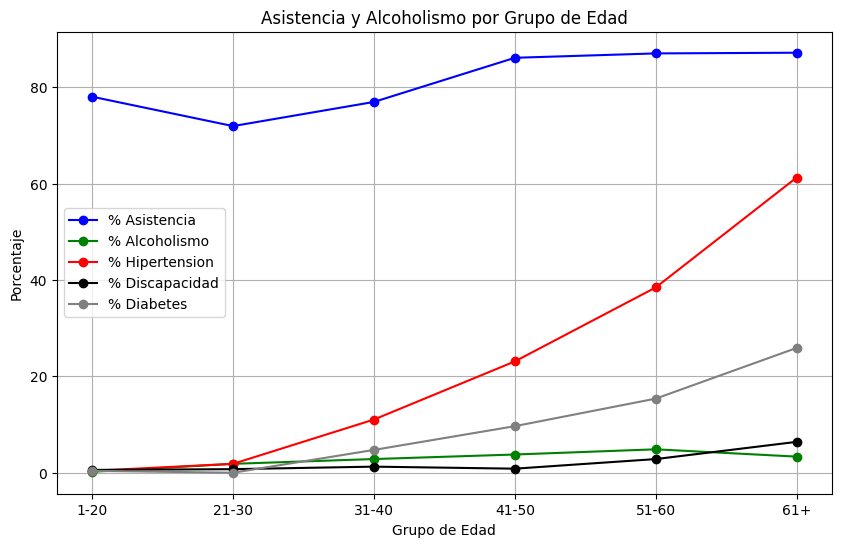

In [ ]:
#defino rangos etarios
bins = [1, 20, 30, 40, 50, 60, 115]
labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61+']

# creo columna de grupo de edades
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculo el porcentaje de asistencia y becados en base a la media
resumen = df.groupby('Age_group', observed=False).agg(
    Showed_up_pct=('Showed_up', 'mean'),
    Alcoholism_pct=('Alcoholism', 'mean'),
    Hipertension_pct=('Hipertension', 'mean'),
    Handcap_pct=('Handcap', 'mean'),
    Diabetes_pct=('Diabetes', 'mean')
).reset_index()

# convierto a porcentaje
resumen['Showed_up_pct'] *= 100
resumen['Alcoholism_pct'] *= 100
resumen['Hipertension_pct'] *= 100
resumen['Handcap_pct'] *= 100
resumen['Diabetes_pct'] *= 100

# Grafico
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(resumen['Age_group'], resumen['Showed_up_pct'], marker='o', label='% Asistencia', color='blue')
ax.plot(resumen['Age_group'], resumen['Alcoholism_pct'], marker='o', label='% Alcoholismo', color='green')
ax.plot(resumen['Age_group'], resumen['Hipertension_pct'], marker='o', label='% Hipertension', color='red')
ax.plot(resumen['Age_group'], resumen['Handcap_pct'], marker='o', label='% Discapacidad', color='black')
ax.plot(resumen['Age_group'], resumen['Diabetes_pct'], marker='o', label='% Diabetes', color='gray')

ax.set_xlabel('Grupo de Edad')
ax.set_ylabel('Porcentaje')
ax.set_title('Asistencia y Alcoholismo por Grupo de Edad')
ax.legend()
ax.grid(True)

plt.show()

- Analizando el gráfico generado podemos ver que, por el comportamiento de la líneas, no hay una relación directa entre el Alcoholistmo, la hipertensión la discapacidad y la diabetes con la asistencia a las citas programadas. A su vez vemos que estas variables si estan relacionadas entre si y junto a la edad.

# Conclusiones finales:

### **¿Qué tan fiable es nuestra base de datos? ¿Cual es su porcentaje de vacíos?**

- **Respuesta:** La base de datos posee un conjunto de información sin campos vacíos.

### **¿Los datos de cada campo se encuentran dentro de los parámetros "normales"? ¿No poseen errores?**

- **Respuesta:** La base de datos posee resultados correctos, verificamos que no cuentan con errores y tienen relación con la realidad (solo 1 paciente < 18 años posee alcoholismo). Si bien vemos que la media no es representativa gracias al calculo del coeficiente de variación notamos que es un comportamiento normal en ambas variables al tratarse de Edades y diferencia de fechas en lugar de KPIs.


### **¿Los pacientes mas jóvenes poseen una asistencia menor debido a su grado de responsabilidad?**

- **Hipótesis:**  Entendemos que si, por el comportamiento normal de la sociedad el porcentaje de asistencia debería verse fuertemente afectado por el grupo etario debido a la responsabilidad del mismo.

- **Conclusión:** Tomando en cuenta la siguiente clasificación:

   Niñez/Adolescencia (01-20)
   Juventud (21-30)
   Juventud adulta (31-40)
   Adultez temprana (41-50)
   Adultez intermedia (51-60)
   Adultez plena (61-70)
   Adultez mayor (71-80)
   Vejez inicial (81-90)
   Vejez avanzada (91-100)

 Junto a los gráficos y tablas realizadas, notamos que efectivamente el grupo etario de "JUVENTUD" posee un porcentaje de asistencia menor (71.49%) al resto de los grupos ya que entendemos que su grado de responsabilidad es el menor fuera del seno familiar (quitando de lado la niñez/adolescencia). A la vez notamos que el % de asistencia va aumentando a medida de que los pacientes se vuelven mas grandes, tiene una caída leve comendando la adultez plena y vuelve a aumentar en la adultez mayor, dándonos a entender que nuevamente poseen un tutor que ayuda a seguir su tratamiento. Ya en el grupo final la asistencia vuelve a caer mostrándonos que nuevamente prefieren no asistir a las citas.


### **¿Mientras mas grande es el tiempo de antelación con el que se pacta la cita, más probabilidad hay de que no asistan a la misma?**

- **Hipótesis:** Si, hay mucha probabilidad de que no asistan al olvidarse de la misma pasado mas de 2 meses.

- **Conclusión:** Analizando de manera gráfica y mediante tablas vemos que los días de antelación y las asistencias no son directamente proporcionales ya que cada punto posee porcentajes muy variados habiendo picos extremadamente altos en los extremos de los grupos por quincena y un pico alto dentro del grupo (46-60).


### **¿Al no pagar por la consulta médica, los pacientes con subsidio, tienden a no asistir a las mismas?**

- **Hipótesis:** Los pacientes deberían tender a no asistir ya que no generan un compromiso real con la cita al no tener un impacto monetario en sus finanzas.

- **Conclusión:** Analizando los datos por grupos etarios mediante gráficos y tablas podemos ver que mientras mas pacientes poseen una mayor cantidad de subsidios menor es la asistencia a las citas, acercándose y alejándose los puntos entre si casi de manera proporcional.


### **¿Qué tan probable es que un paciente no asista a su cita médica al no recibir un SMS recordatorio?**

- **Hipótesis:** Es muy probable ya que al no recibir el SMS confirmatorio los pacientes tienden a olvidarse de la misma.

- **Conclusión:** Analizando los datos, distinto a la hipótesis planteada, vemos que el porcentaje de probabilidad de no asistencia al no recibir el SMS confirmatorio mas bajo que recibiéndolo (13.86% y 25.85% respectivamente) dándonos a entender que no es una variable directamente proporcional a la asistencia. Es probable que tengan otros motivos para no asistir a la cita programada.

### **¿Cuáles son las variables mas imporantes a la hora de determinar si un paciente asistirá a su cita médica?**

- **Hipótesis:** Las variables mas importantes deberian ser las que corresponden a las enfermedades y a los tiempos de antelación con los que se programa la cita médica.

- **Conclusión preliminar - (A confirmar una vez se realice el aprendizaje supervisado o no supervisado):** Luego de todo el análisis realizado sobre las **features** verificamos que las verdaderamente importantes corresponden a:
  - La Edad. (posee una fuerte relacion debido a su CV alto)
  - Las becas. (es casi directamente proporcional a la asistencia.)
  - Los tiempos de antelación. (posee una fuerte relacion debido a su CV alto)

#PARTE II:

###Introducción:
- Teniendo en cuenta que el dataset seleccionado posee un feature objetivo (Outcome: Showed_up) el análisis tratará de un problema de clasificación supervisado.
- Por ello utilizaré métodos de clásificación para poder predecir si un paciente asistirá o no a su cita médica en base al resto de features que previamente verificamos que si poseen relación con la posible asistencia.

#Importación de métodos / División de conjuntos (CAMPOS HIPÓTESIS):

In [5]:
#importo el fragmentador del dataset, el modelo de regression y las metricas para verificar su efectividad
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#selecciono las features a utilizar para entrenar y testear el modelo "x" las utilizadas para entrenar "y" las utilizadas para testear
x = df[['Age','Scholarship','Date.diff']]
y = df['Showed_up']
#divido mi dataset dejando un 30% para testear el modelo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

##Método 1:

In [ ]:
#ENTRENAMIENTO DEL MODELO
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#METRICAS DE PREDICCIÓN
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7966666666666666
[[  0 120]
 [  2 478]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.80      1.00      0.89       480

    accuracy                           0.80       600
   macro avg       0.40      0.50      0.44       600
weighted avg       0.64      0.80      0.71       600



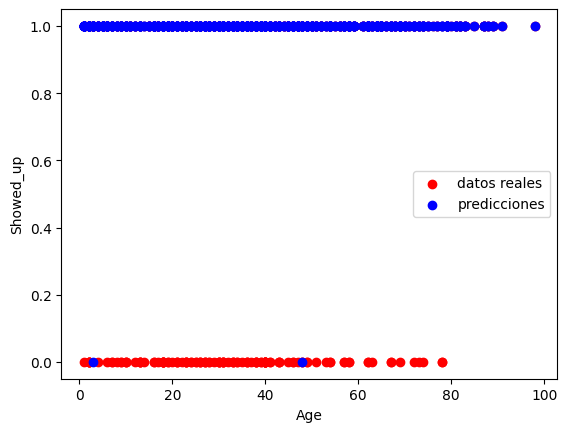

In [ ]:
#VISUAL ACCURACY
import matplotlib.pyplot as plt
plt.scatter(x_test['Age'], y_test, color='red', label='datos reales')
plt.scatter(x_test['Age'], y_pred, color='blue', label='predicciones')
plt.xlabel('Age')
plt.ylabel('Showed_up')
plt.legend()
plt.show()

### Analizando resultados:
- Verificando los resultados obtenidos por el modelo de regreción logística con las variables seleccionadas podemos ver que hubo una precisión global del modelo (accuracy) del 79.7%.
- También se notó que los casos en los que los pacientes si asistían a sus citas medicas (1) fueron mas fácilmente predichos por el modelo (Presicion: 80%) que los que no (Presición: 0%).
- Esto nos acerca bastante a la hipotesis que se sacó anteriormente donde indicamos que las 3 features seleccionadas (age - scholarship - date.diff) si ayudan a predecir si un paciente asiste a su cita médica, pero no así a la **"no asistencia"**.

##Método 2:

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7683333333333333
[[ 31  89]
 [ 50 430]]
              precision    recall  f1-score   support

           0       0.38      0.26      0.31       120
           1       0.83      0.90      0.86       480

    accuracy                           0.77       600
   macro avg       0.61      0.58      0.58       600
weighted avg       0.74      0.77      0.75       600



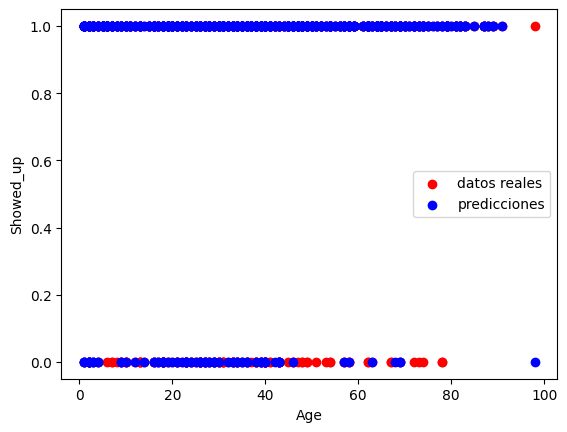

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test['Age'], y_test, color='red', label='datos reales')
plt.scatter(x_test['Age'], y_pred, color='blue', label='predicciones')
plt.xlabel('Age')
plt.ylabel('Showed_up')
plt.legend()
plt.show()

### Analizando resultados:
- Verificando los resultados obtenidos por el modelo de RandomForest con las mismas variables que el modelo anterior podemos ver que hubo una precisión global de 76.8% (2.9% menos que LogisticRegression). Esto se debe a que el modelo anterior no clasificaba de manera precisa tomando la mayoría de los casos como (1) teniendo por consecuencia un porcentaje de accuracy global alto (sabemos con la primer parte del analisis que la mayor parte del dataset asiste a sus citas).
- En este modelo el porcentaje de aciertos tanto para asistencias como inasistencias aumentó logrando un 83% de presición para (asiste) y un 38% para (no asiste) teniendo un desempeño mas realista.

#División de conjuntos (Hipótesis + Neighbourhood):


- Debido a que se nota un bajo % de presicion con las variables identificadas como clave en la hipótesis, decidí utilizar una variable que haya estado fuera del análisis desde la primera parte.
- Realizaré el metodo One hot encoding en dicho campo junto a Random Forest para intentar aumentar la presición.

0.7683333333333333
[[ 30  90]
 [ 49 431]]
              precision    recall  f1-score   support

           0       0.38      0.25      0.30       120
           1       0.83      0.90      0.86       480

    accuracy                           0.77       600
   macro avg       0.60      0.57      0.58       600
weighted avg       0.74      0.77      0.75       600



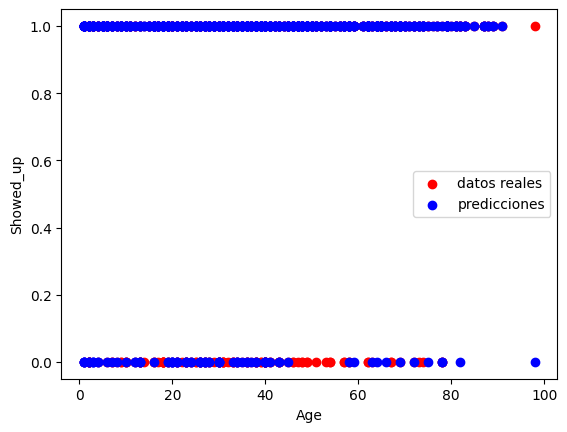

In [ ]:
# Creo los dummies
dum = pd.get_dummies(df, columns=['Neighbourhood'], drop_first=True)

# Selecciono features
feature_cols = ['Age','Scholarship','Date.diff'] + [col for col in dum.columns if 'Neighbourhood_' in col]
x = dum[feature_cols]
y = df['Showed_up']

# Divido mi dataset dejando un 30% para testear el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

# Entreno
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predigo y metrico
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gráfico
import matplotlib.pyplot as plt
plt.scatter(x_test['Age'], y_test, color='red', label='datos reales')
plt.scatter(x_test['Age'], y_pred, color='blue', label='predicciones')
plt.xlabel('Age')
plt.ylabel('Showed_up')
plt.legend()
plt.show()

## Conclusión parcial:
Como conclusión parcial se puede ver que al agregar una feature más al modelo de predicción el resultado es prácticamente el mismo notando que no afecta al resultado el origen de cada paciente.

#División de conjuntos (Campos representativos):

- Se definirá en este análisis como campos representativos todos aquellos que pueden ser utilizados para el modelo de predicción de manera efectiva junto a la ayuda de One hot encoding.
- En este caso quitaré los campos de: PatientId - AppointmentID - ScheduledDay - AppointmentDay.

In [25]:
#Importo el standardScaler para poder escalar los campos que poseen resultados numéricos luego de hacer one hot encoding sobre las columnas de Genero y Localidad
from sklearn.preprocessing import StandardScaler

# Selecciono features
y = df['Showed_up']
#Elimino de mi dataframe las columnas que no utilizaré en el modelo de entrenamiento
x = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Showed_up'])

#Utilizo el método de one-hot encoding sobre las columnas que no poseen valores booleanos o numericos.
x = pd.get_dummies(x, columns=['Gender', 'Neighbourhood'], drop_first=True)
#Agrupo las columnas numéricas
numerical_columns = x.select_dtypes(include=['int64', 'float64']).columns
#Escalo las columnas numéricas y formo mi nuevo dataframe
scaler = StandardScaler()
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

0.77875
[[ 26 138]
 [ 39 597]]
              precision    recall  f1-score   support

           0       0.40      0.16      0.23       164
           1       0.81      0.94      0.87       636

    accuracy                           0.78       800
   macro avg       0.61      0.55      0.55       800
weighted avg       0.73      0.78      0.74       800



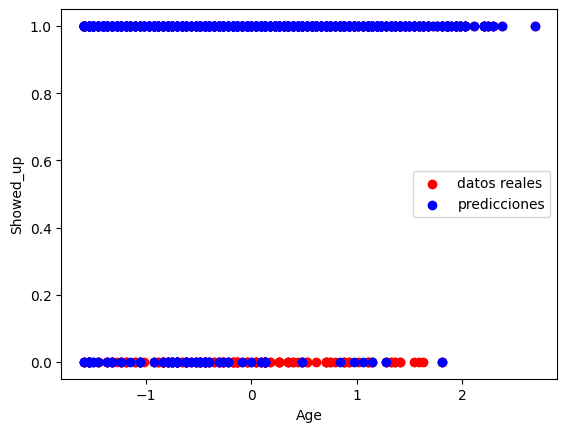

In [29]:
# Divido mi dataset dejando un 40% para testear el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=7)

# Entreno
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predigo y metrico
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gráfico
import matplotlib.pyplot as plt
plt.scatter(x_test['Age'], y_test, color='red', label='datos reales')
plt.scatter(x_test['Age'], y_pred, color='blue', label='predicciones')
plt.xlabel('Age')
plt.ylabel('Showed_up')
plt.legend()
plt.show()

### Conclusión parcial:
- En esta ocasión se aumento el porcentaje de testeo de un 30% a un 40% para aumentar el porcentaje de precisión tanto individual como global alcanzando un 77.8% (mejor que las 2 pruebas anteriores).
- Si bien se sumaron todas las columnas el % de precisión no aumento considerablemente.
- Debido a que no se logró aumentar el accuracy global, comenzaré a enfocarme en aumentar los KPI de **Presicion**, **Recall** y **F1 SCORE** de 0 ya que en la clínica debería ser mas importante detectar a los casos que NO van a asistir ya que eso ayudaría a su propia organización de tareas entre turnos.

# Para Presicion, Recall y F1 SCORE de 0 (no asiste):

Enfocandonos en la metrica de F1 SCORE vamos a tomar los siguientes caminos y analizar los resultados:

1.  SMOTE (Synthetic Minority Over-sampling Technique).
2.  Ajuste de threshold.





Distribución después de SMOTE: Counter({1: 1294, 0: 1294})
Accuracy global: 0.72
=== Evaluación Final ===
[[ 21  56]
 [ 37 286]]
              precision    recall  f1-score   support

           0       0.36      0.27      0.31        77
           1       0.84      0.89      0.86       323

    accuracy                           0.77       400
   macro avg       0.60      0.58      0.59       400
weighted avg       0.74      0.77      0.75       400

Recall clase 0 (no asisten): 0.2727272727272727
Accuracy global: 0.72
Confusion matrix (threshold=0.35):
[[ 40  37]
 [ 75 248]]
              precision    recall  f1-score   support

           0       0.35      0.52      0.42        77
           1       0.87      0.77      0.82       323

    accuracy                           0.72       400
   macro avg       0.61      0.64      0.62       400
weighted avg       0.77      0.72      0.74       400

Recall clase 0 (no asisten, threshold=0.35): 0.5194805194805194


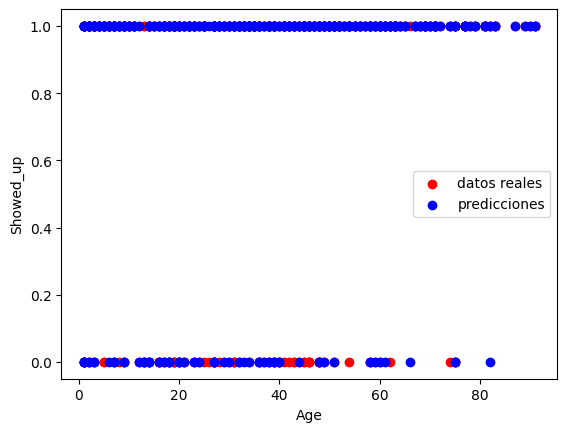

In [29]:
#Importo lo requerido
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
#Selección de features:
y = df['Showed_up']
X = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Showed_up'])

# One-hot encoding
X = pd.get_dummies(X, columns=['Gender', 'Neighbourhood'], drop_first=True)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar features numéricas
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --------------------------------------------------------------
# SMOTE Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("Distribución después de SMOTE:", Counter(y_res))

# --------------------------------------------------------------
# 3) Entreno el modelo de RandomForest
model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(X_res, y_res)

# --------------------------------------------------------------
# 4) Metrico
accuracy = accuracy_score(y_test, y_pred_thresh)
print("Accuracy global:", accuracy)
y_pred = model.predict(X_test)
print("=== Evaluación Final ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Recall clase 0 (no asisten):", recall_score(y_test, y_pred, pos_label=0))

# --------------------------------------------------------------
# 5) Ajuste de threshold (configuro threshold)
idx0 = list(model.classes_).index(0)
proba_0 = model.predict_proba(X_test)[:, idx0]

# Elijo el porcentaje personalizado para Threshold
threshold = 0.35
y_pred_thresh = np.where(proba_0 >= threshold, 0, 1)

#Metrico
accuracy = accuracy_score(y_test, y_pred_thresh)
print("Accuracy global:", accuracy)
print("Confusion matrix (threshold={}):".format(threshold))
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("Recall clase 0 (no asisten, threshold={}):".format(threshold),
      recall_score(y_test, y_pred_thresh, pos_label=0))

#Gráfico
X_plot = X_test.copy()
X_plot['Age'] = scaler.inverse_transform(X_test[num_cols])[:, list(num_cols).index('Age')]
import matplotlib.pyplot as plt
plt.scatter(X_plot['Age'], y_test, color='red', label='datos reales')
plt.scatter(X_plot['Age'], y_pred, color='blue', label='predicciones')
plt.xlabel('Age')
plt.ylabel('Showed_up')
plt.legend()
plt.show()


#Conclusión Final:



Luego de utilizar SMOTE podemos decir lo siguiente:

Para la clase 0 (no asiste):
- Precision: 0.36 → De todos los casos que el modelo predijo como 0, solo el 36% realmente no asistieron.
- Recall: 0.27 → De todos los que realmente no asistieron, el modelo acertó solo el 27%.
- F1-score: 0.31 → Balance entre precision y recall.  

Para la clase 1 (asiste):
- Precision: 0.84 → De todos los predichos como 1, el 84% realmente asistieron.
- Recall: 0.89 → De todos los que realmente asistieron, acertó el 89%.
- F1-score: 0.86 → Buen desempeño en la clase mayoritaria.

Resumiendo, aumentamos el porcentaje de precision, recall y F1-score respecto a las pruebas sin SMOTE.

Aun asi no conformes con el resultado se decidió utilizar Threshold para poder manejar la muestra de manera que sean predichos más casos de (no asiste).

Luego de la prueba de Threshold podemos analizar lo siguiente en la clase minoritaria (0 - no asiste):

- Precision: 0.35 → De todos los casos que el modelo predijo como “no asiste”, solo el 35% realmente no asistieron.
- Recall: 0.52 → De todos los que realmente no asistieron, el modelo acertó el 52%.
- F1-score: 0.42 → Balance entre precision y recall.

Estos resultados sin afectar demaciado a la clase mayoritaria quedando de la siguiente manera:

- Precision de 84% a 87% (Aumenta 3%)
- Recall de 89% a 77% (Baja 12%)
- F1 Score de 86% a 82% (Baja 4%)

**De este modo junto a un 72% de accuracy global, aseguramos que los casos que no asisten son predichos lo mas correctamente posible para poder asistir al personal en la organizacion de tareas entre turnos.**